# Supplier Quality Ratios:
## A supplemental way to evaluate supplier quality
The following code generates the figures found in the essay *Supplier Quality Ratios: A supplemental way to evaluate supplier quality*. The essay can be found [here](https://static1.squarespace.com/static/5b722db6f2e6b1ad5053391b/t/6789790261af002ec3b0edd6/1737062659434/Supplier-quality-ratios.pdf).

Figure 1 in the following code is generated with the Python package `process_improvement.py`. This package can be found [here](https://pypi.org/project/process-improvement/). Package can be installed using `pip install process-improvement`.

In [1]:
# Import libraries
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Import modules from process_improvement
from process_improvement import xmr_charts as xmr

%matplotlib inline

In [12]:
# Dataset URL
dataset_url = r'https://raw.githubusercontent.com/jimlehner/broken-quality-initiative/refs/heads/main/data/supplier_quality_ratios-monthly_DMR_PO_counts_data.csv'

# Get data
def get_data() -> pd.DataFrame:
    return pd.read_csv(dataset_url, index_col=0)

# Get data
df = get_data()

# Make 'Month' column dtype string
df['Month'] = df['Month'].astype('string')

# Specify dtypes
df.dtypes

Month         string
DMR Count      int64
PO Count       int64
SQR          float64
dtype: object

## Fig 1: XmR Chart of SQRs by month last year

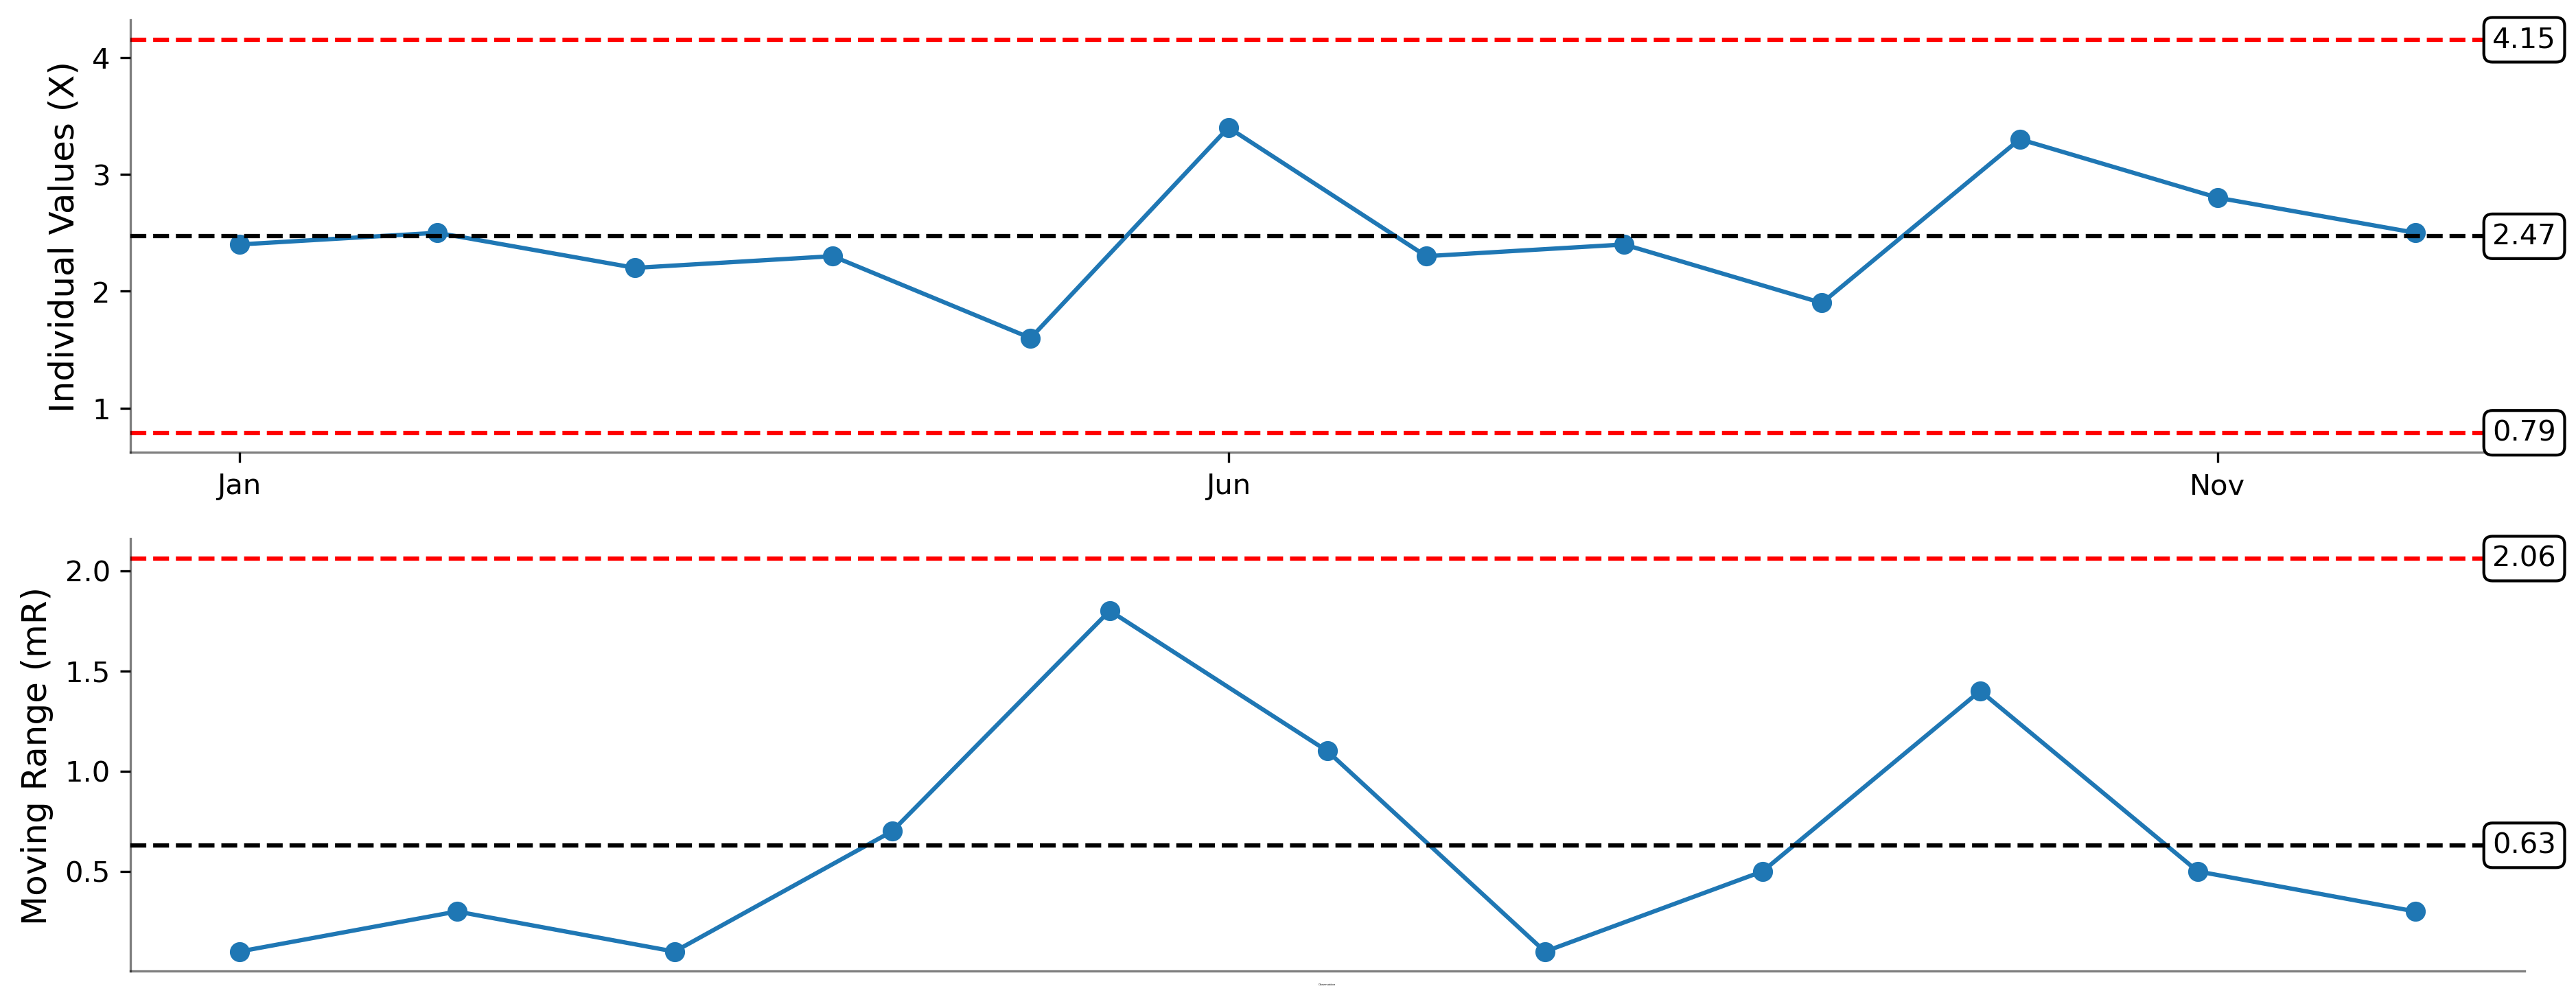

In [14]:
SQR_results = xmr.xmrchart(df, 'SQR', 'Month')

In [16]:
# Show SQR results
SQR_results['XmR Chart Statistics']

,Chart,PBC Params,Param Values
0,X-Chart,Mean,2.47
1,X-Chart,UPL,4.15
2,X-Chart,LPL,0.79
3,X-Chart,PLR,3.36
4,mR-Chart,Ave. mR,0.63
5,mR-Chart,URL,2.06


## Fig 2: Bar chart of SQRs by supplier

In [21]:
# 2nd dataset URL
dataset_url_2 = r'https://raw.githubusercontent.com/jimlehner/broken-quality-initiative/refs/heads/main/data/supplier_quality_ratios-supplier_DMR_and_PO_counts_data.csv'

# Get second dataset
def get_data() -> pd.DataFrame:
    return pd.read_csv(dataset_url_2, index_col=0)

# Get data
suppliers_df = get_data()
suppliers_df

,Supplier,DMR Count,PO Count,SQR
0,Swiss Machining Co.,15,31,48.4
1,Plating South LLC,23,94,24.5
2,Evergreen Aerospace,111,1649,6.7
3,Vertex Industrial Supplies,22,449,4.9
4,Aero Defense Co.,62,1903,3.3
5,Prime Materials,31,1304,2.4
6,Apex Manufacturing Inc,18,2976,0.6
7,Unified Parts & Equipment,16,5031,0.3


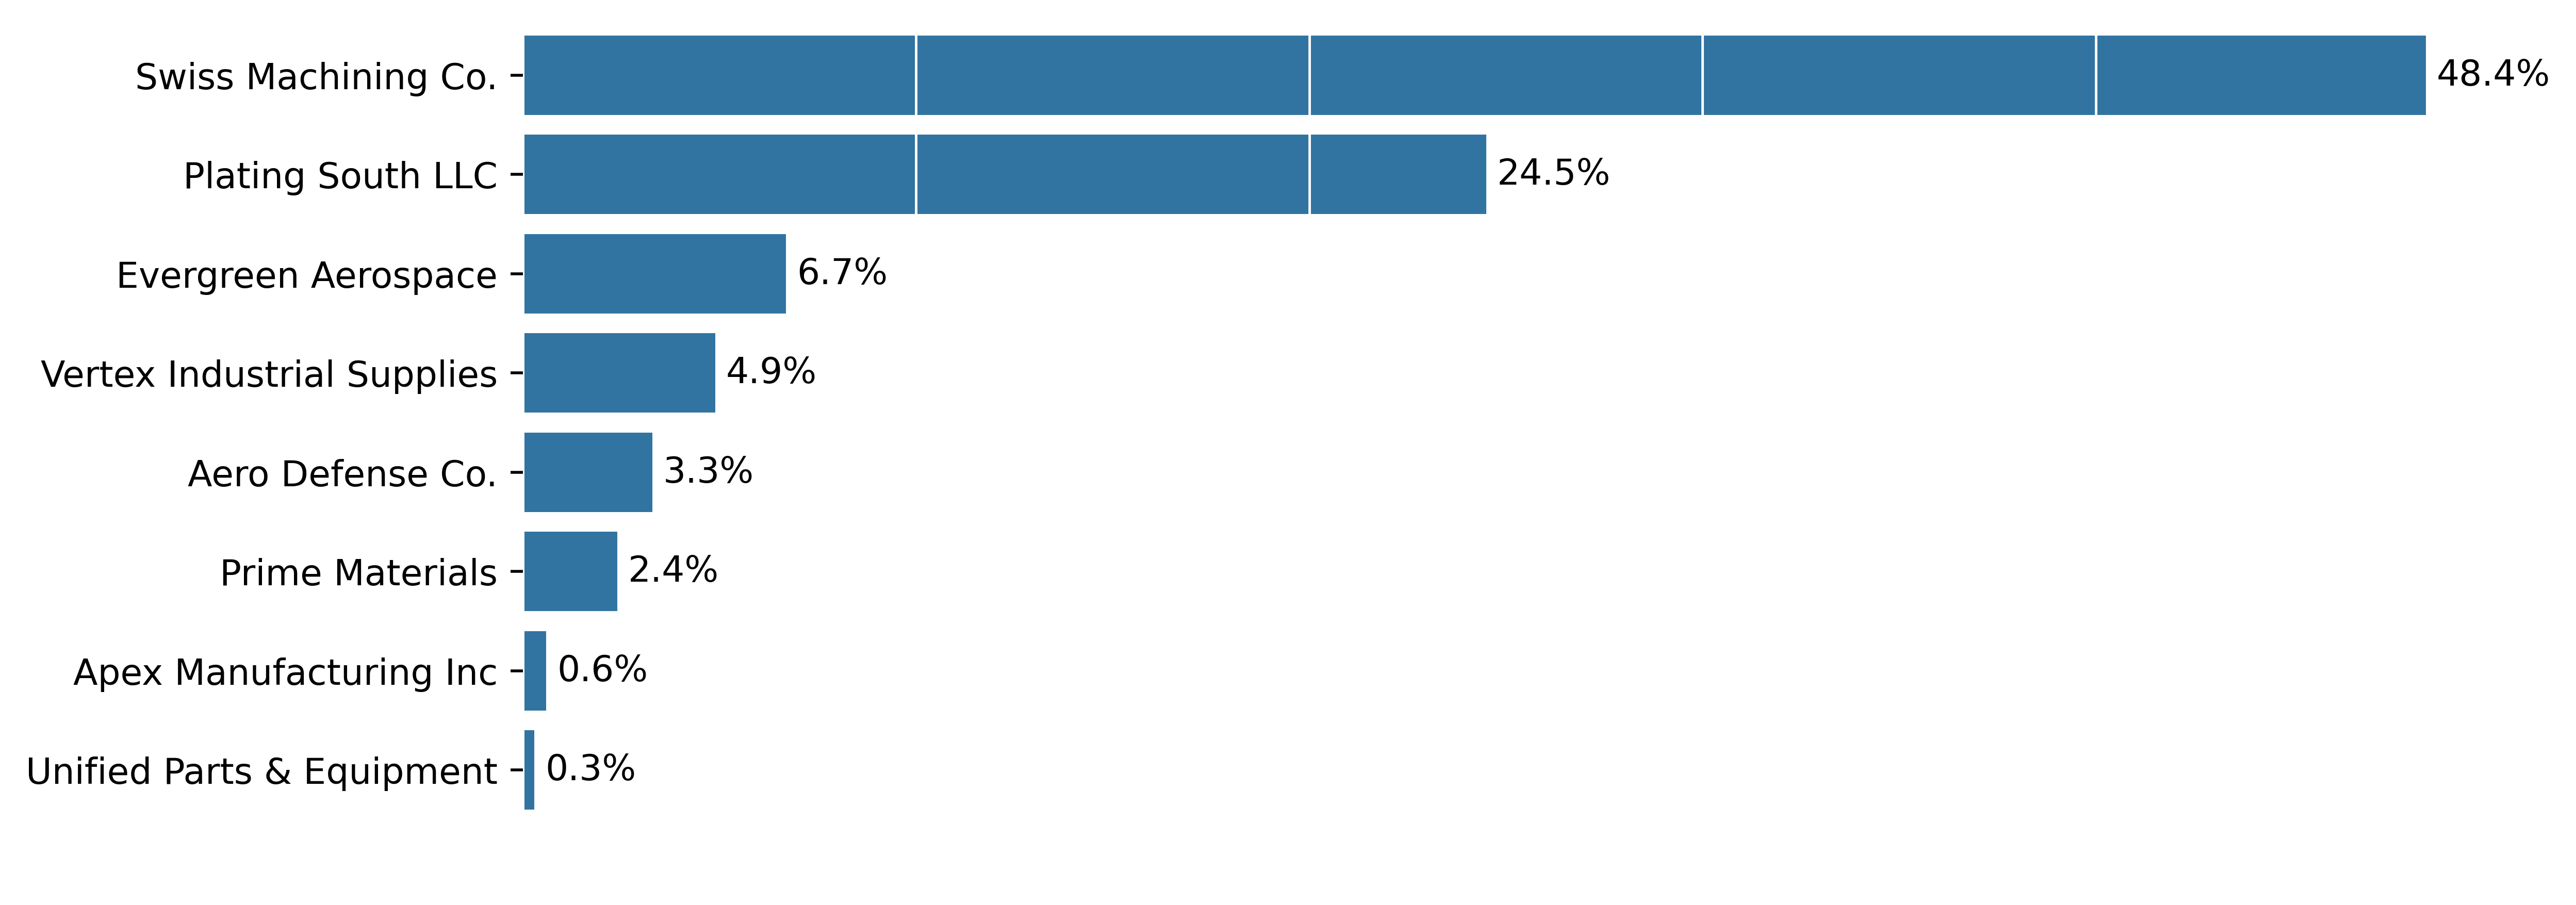

In [22]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10,4), dpi=500)

# Plot data
sns.barplot(suppliers_df, y='Supplier', x='SQR', color='tab:blue')

# Add values to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

sns.despine(left=True, bottom=True)

# plt.title('Supplier Quality Ratios')

ax.set_ylabel('')
ax.set_xlabel('')
# ax.set_xlabel('Supplier Quality Ratio', labelpad=-15, fontsize=14)

# Change x-tick color to white
ax.tick_params(axis='x', colors='white')

# Add white vertical grid lines
ax.grid(axis='x', color='white', linestyle='-', linewidth=0.7, zorder=3)

plt.show()